In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [3]:
df_train = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_train.csv")
df_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train.shape

(60000, 785)

In [5]:
df_test = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_test.csv")
df_test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
df_test.shape

(10000, 785)

### labels
* 0 : T-shirt/top
* 1 : Trouser
* 2 : Pullover
* 3 : Dress
* 4 : Coat
* 5 : Sandal
* 6 : Shirt
* 7 : Sneaker
* 8 : Bag
* 9 : Ankel boot

In [7]:
X_t = df_train.drop(["label"], axis=1)
Y_t = df_train.label.values
print(X_t.shape, Y_t.shape)

(60000, 784) (60000,)


In [8]:
X_test = df_test.drop(["label"], axis=1)
Y_test = df_test.label.values
print(X_test.shape, Y_test.shape)

(10000, 784) (10000,)


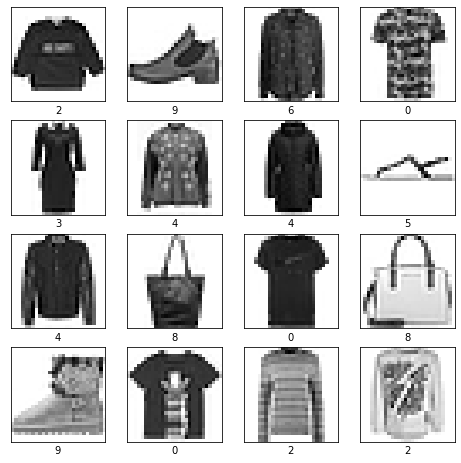

In [9]:
plt.figure(figsize=(8, 8))
X = X_t.to_numpy().reshape(60000, 28, 28)
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i], cmap=plt.cm.binary)
    plt.xlabel(str(Y_t[i]))
plt.show()

In [10]:
X_train, X_val, Y_train, Y_val = train_test_split(X_t, Y_t, test_size=0.2, stratify = Y_t, random_state = 42)

In [11]:
print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [12]:
X_train.values.dtype

dtype('int64')

In [13]:
X_train = X_train.astype("float64")/255
X_val = X_val.astype("float64")/255
X_test = X_test.astype("float64")/255

In [14]:
Y_train[0]

6

In [15]:
# one hot encoding
Y_train = to_categorical(Y_train, 10)
Y_val = to_categorical(Y_val, 10)
Y_test = to_categorical(Y_test, 10)

In [16]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# 모델 생성

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [18]:
model = Sequential()
model.add(Dense(256, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
history = model.fit(X_train, Y_train,
          batch_size=200,
          epochs=20,
          verbose=1, 
          validation_data=(X_val, Y_val))

Epoch 1/20
240/240 [==============================] - 1s 4ms/step - loss: 0.5886 - accuracy: 0.7959 - val_loss: 0.4378 - val_accuracy: 0.8428
Epoch 2/20
240/240 [==============================] - 1s 3ms/step - loss: 0.4171 - accuracy: 0.8531 - val_loss: 0.4025 - val_accuracy: 0.8553
Epoch 3/20
240/240 [==============================] - 1s 3ms/step - loss: 0.3746 - accuracy: 0.8662 - val_loss: 0.3764 - val_accuracy: 0.8640
Epoch 4/20
240/240 [==============================] - 1s 3ms/step - loss: 0.3445 - accuracy: 0.8775 - val_loss: 0.3606 - val_accuracy: 0.8698
Epoch 5/20
240/240 [==============================] - 1s 3ms/step - loss: 0.3274 - accuracy: 0.8820 - val_loss: 0.3497 - val_accuracy: 0.8752
Epoch 6/20
240/240 [==============================] - 1s 3ms/step - loss: 0.3142 - accuracy: 0.8873 - val_loss: 0.3378 - val_accuracy: 0.8761
Epoch 7/20
240/240 [==============================] - 1s 3ms/step - loss: 0.2987 - accuracy: 0.8916 - val_loss: 0.3195 - val_accuracy: 0.8848
Epoch 

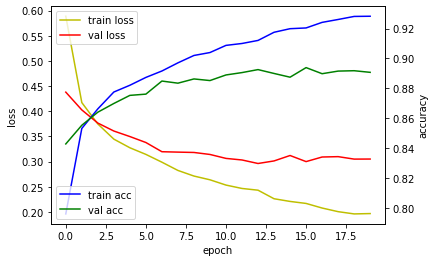

In [21]:
# 모델 학습 과정
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [22]:
score = model.evaluate(X_test, Y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.295943021774292
Test accuracy: 0.8917999863624573


# CNN 모델 생성

In [23]:
# CNN 모델 라이브러리
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical

In [24]:
X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.values.reshape(X_val.shape[0], 28, 28, 1)
print(X_train.shape, X_val.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1)


In [25]:
# 모델 define
model2 = Sequential()
model2.add(Conv2D(32, kernel_size =(3,3), input_shape = (28, 28, 1), activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size = 2))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation = 'softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                589888    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)               

In [26]:
model2.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
history = model2.fit(X_train, Y_train,
          batch_size=200,
          epochs=30,
          verbose=1, 
          validation_data=(X_val, Y_val))

Epoch 1/30
240/240 [==============================] - 2s 8ms/step - loss: 0.7302 - accuracy: 0.7422 - val_loss: 0.3833 - val_accuracy: 0.8636
Epoch 2/30
240/240 [==============================] - 2s 7ms/step - loss: 0.4668 - accuracy: 0.8349 - val_loss: 0.3265 - val_accuracy: 0.8832
Epoch 3/30
240/240 [==============================] - 2s 7ms/step - loss: 0.3997 - accuracy: 0.8593 - val_loss: 0.3035 - val_accuracy: 0.8877
Epoch 4/30
240/240 [==============================] - 2s 8ms/step - loss: 0.3606 - accuracy: 0.8713 - val_loss: 0.2742 - val_accuracy: 0.9021
Epoch 5/30
240/240 [==============================] - 2s 7ms/step - loss: 0.3336 - accuracy: 0.8798 - val_loss: 0.2637 - val_accuracy: 0.9040
Epoch 6/30
240/240 [==============================] - 2s 7ms/step - loss: 0.3121 - accuracy: 0.8869 - val_loss: 0.2454 - val_accuracy: 0.9108
Epoch 7/30
240/240 [==============================] - 2s 7ms/step - loss: 0.2930 - accuracy: 0.8934 - val_loss: 0.2384 - val_accuracy: 0.9129
Epoch 

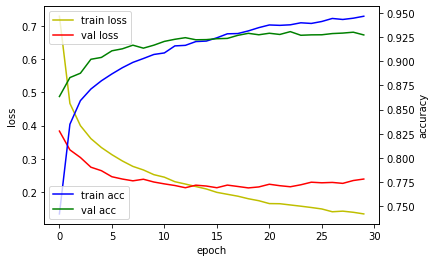

In [28]:
# 모델 학습 과정
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [29]:
X_test = X_test.values.reshape(X_test.shape[0], 28, 28, 1)

score = model2.evaluate(X_test, Y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.24952755868434906
Test accuracy: 0.926800012588501
